In [1]:
from pathlib import Path
import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, gaussian_kde, mannwhitneyu, pearsonr, spearmanr
import seaborn as sns
#import shap
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from tqdm.notebook import tqdm
from pymodulon.compare import compare_ica
from pymodulon.core import IcaData
from pymodulon.io import load_json_model, save_to_json
from pymodulon.plotting import *

sys.path.append('../../bitome2')
sys.path.append('../')

from bitome.core import Bitome
from bitome.ml import *

sns.set_style('whitegrid')

shap.initjs()

ModuleNotFoundError: No module named 'bitome'

In [4]:
K12_DATA_PATH = Path('../data/bitome2/mg1655')

In [3]:
# from GenBank annotation
origin = (3925743, 3925975)
# from 1. Duggin, I. G. & Bell, S. D. J. Mol. Biol. (2009). with the following terA/terC sequences:
# ter_a = 'AATTAGTATGTTGTAACTAAAGT'
# ter_c = 'ATATAGGATGTTGTAACTAATAT'
terminus = (1341745, 1609180)
cid_boundaries = [50000, 142779, 223485, 446815, 927474, 985894, 1080000, 1195008, 1301085, 1577657,
                 1799393, 1852621, 2102875, 2259719, 2380722, 2533498, 2726069, 2905711, 2996372, 3297098,
                 3423423, 3440040, 3652182, 3811250, 3941516, 4035239, 4166484, 4470986]

In [4]:
mg1655 = Bitome(
    Path(K12_DATA_PATH, 'NC_000913.3.gb'),
    name='MG1655',
    origin=origin, terminus=terminus,
    cid_boundaries=cid_boundaries,
    gene_table=Path(K12_DATA_PATH, 'gene_info_supp.csv'),
    tu_table=Path(K12_DATA_PATH, 'tu.csv'),
    operon_table=Path(K12_DATA_PATH, 'operon.csv'),
    tss_table=Path(K12_DATA_PATH, 'tss.csv'),
    tfbs_table=Path(K12_DATA_PATH, 'tfbs.csv'),
    terminator_table=Path(K12_DATA_PATH, 'terminator.csv'),
    attenuator_table=Path(K12_DATA_PATH, 'attenuator.csv'),
    rbs_table=Path(K12_DATA_PATH, 'rbs.csv'),
    riboswitch_table=Path(K12_DATA_PATH, 'riboswitch.csv')
)

In [5]:
from pymodulon.example_data import load_ecoli_data
ica_data = load_ecoli_data()
#ica_data.log_tpm = pd.read_csv("log_tpm.csv", index_col=0)

# ptsG - Crp-2, DhaR/Mlc

In [2]:
import plotly.graph_objs as go
import numpy as np

im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b1101' #ptsG
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='dhaR/mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='ptsG TPM'))

# Show plot
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [58]:
x.to_csv('dhaR_mlc A.csv')

In [59]:
y.to_csv('crp2 A.csv')

In [60]:
z.to_csv('ptsG TPM.csv')

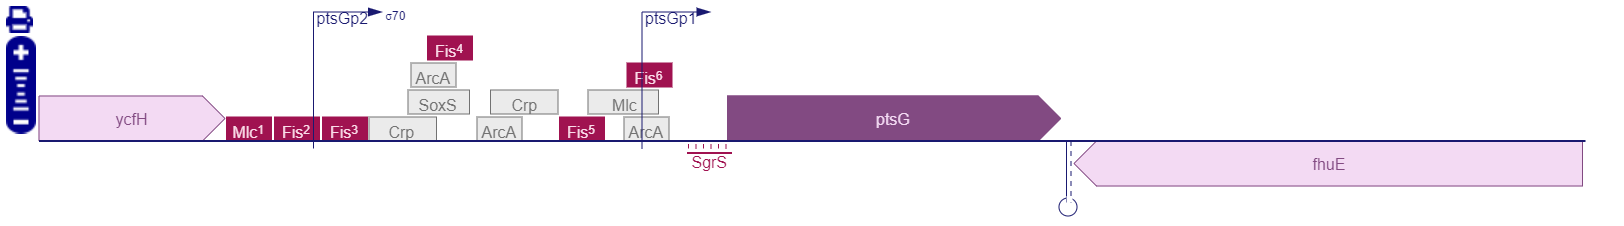

# manX - Crp-2, DhaR/Mlc

In [38]:
im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b1817' #manX
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='dhaR/mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='manX TPM'))

# Show plot
fig.show()

# manY - Crp-2, DhaR/Mlc

In [45]:
import plotly.graph_objs as go
import numpy as np

im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b1818' #manY
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='dhaR/mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='manY TPM'))

# Show plot
fig.show()

# manZ - Crp-2, DhaR/Mlc

In [46]:
import plotly.graph_objs as go
import numpy as np

im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b1819' #manZ
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='dhaR/mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='manZ TPM'))

# Show plot
fig.show()

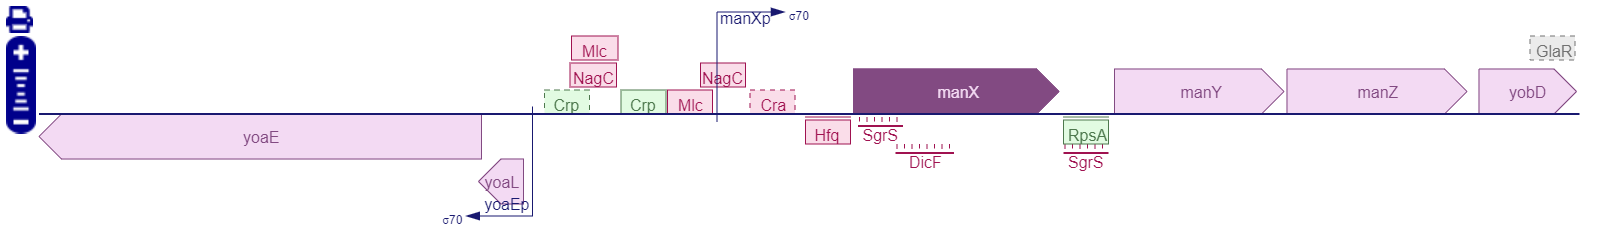

# galS - Crp-1, Crp-2

In [37]:
import plotly.graph_objs as go
import numpy as np

im_cur2 = 'Crp-1'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b2151' #galS
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp1 A',
                             yaxis_title='crp2 A',
                             zaxis_title='galS TPM'))

# Show plot
fig.show()

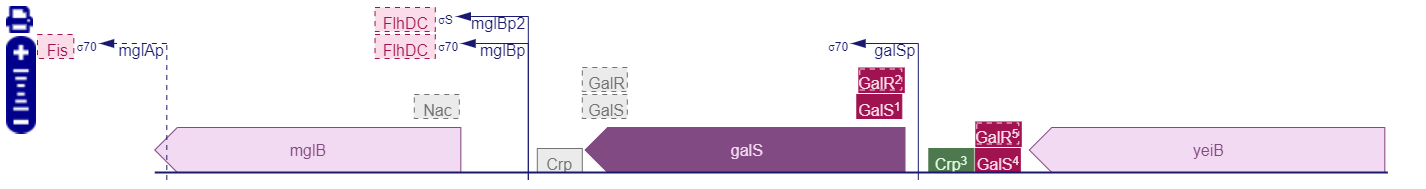

# mtlR - Crp-1, Crp-2

In [11]:
im_cur2 = 'Crp-1'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3601' #mtlR
z = ica_data.X.loc[gene_cur]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp1 A',
                             yaxis_title='crp2 A',
                             zaxis_title='mtlR TPM'))

# Show plot
fig.show()

# mtlD -  Crp-1, Crp-2, DhaR/Mlc


In [17]:
import plotly.express as px
im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3600' #mtlD
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='DhaR/Mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='mtlD TPM'))

# Show plot
fig.show()

In [43]:
import plotly.express as px
im_cur2 = 'Crp-1'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3600' #mtlD
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp1 A',
                             yaxis_title='crp2 A',
                             zaxis_title='mtlD TPM'))

# Show plot
fig.show()


# mtlA - Crp-1, Crp-2, DhaR/Mlc

In [40]:
import plotly.express as px
im_cur2 = 'DhaR/Mlc'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3599' #mtlA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='DhaR/Mlc A',
                             yaxis_title='crp2 A',
                             zaxis_title='mtlA TPM'))

# Show plot
fig.show()

In [24]:
import plotly.express as px
im_cur2 = 'Crp-1'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3599' #mtlA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp1 A',
                             yaxis_title='crp2 A',
                             zaxis_title='mtlA TPM'))

# Show plot
fig.show()

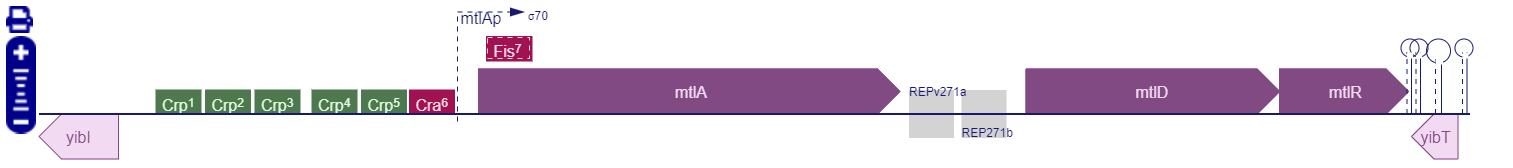

# glpQ - Crp-2, GlpR

In [42]:
im_cur2 = 'GlpR'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b2239' #glpQ
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='GlpR',
                             yaxis_title='crp2 A',
                             zaxis_title='glpQ TPM'))

# Show plot
fig.show()

# glpT - Crp-2, GlpR

In [47]:
im_cur2 = 'GlpR'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-2'
y = ica_data.A.loc[im_cur]
gene_cur = 'b2240' #glpT
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='glpR',
                             yaxis_title='crp2 A',
                             zaxis_title='glpT TPM'))

# Show plot
fig.show()

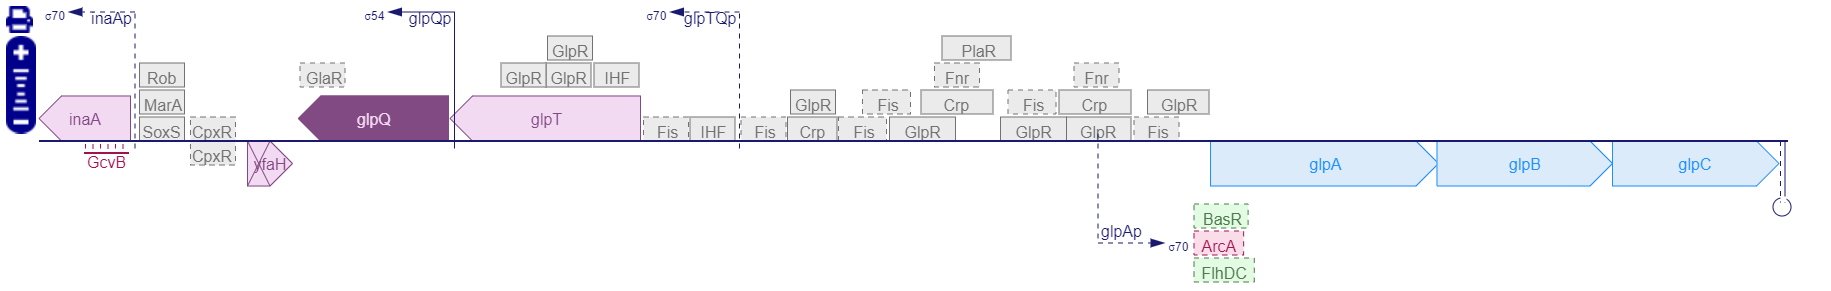

# sdhA - Crp-2, ArcA-1

In [26]:
import plotly.express as px
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'ArcA-1'
y = ica_data.A.loc[im_cur]
gene_cur = 'b0723' #sdhA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='arca1 A',
                             zaxis_title='sdhA TPM'))

# Show plot
fig.show()

In [44]:
import plotly.express as px
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-1'
y = ica_data.A.loc[im_cur]
gene_cur = 'b0723' #sdhA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='crp1 A',
                             zaxis_title='sdhA TPM'))

# Show plot
fig.show()

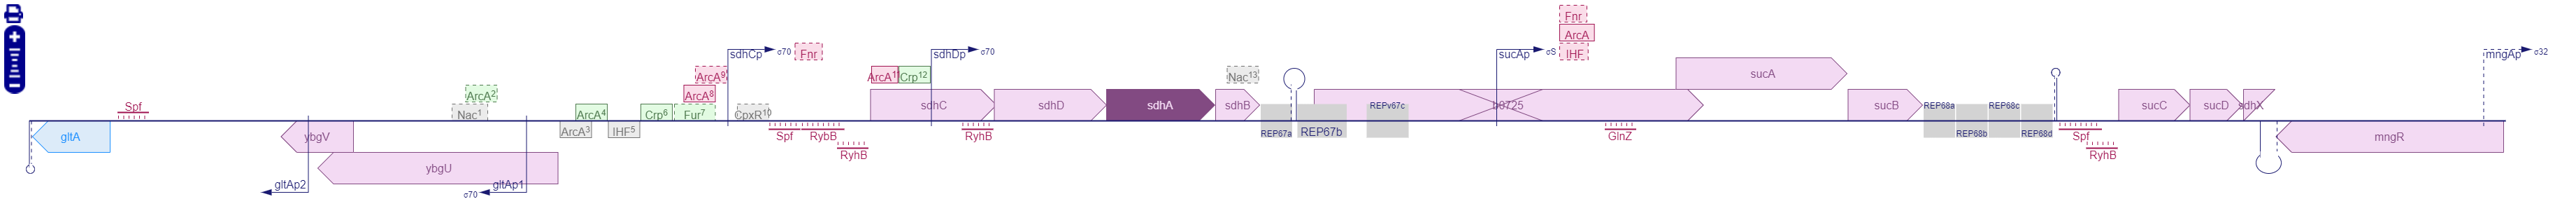

# aldA - Crp-2, Crp-1

In [41]:
import plotly.express as px
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'Crp-1'
y = ica_data.A.loc[im_cur]
gene_cur = 'b1415' #aldA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='crp1 A',
                             zaxis_title='aldA TPM'))

# Show plot
fig.show()

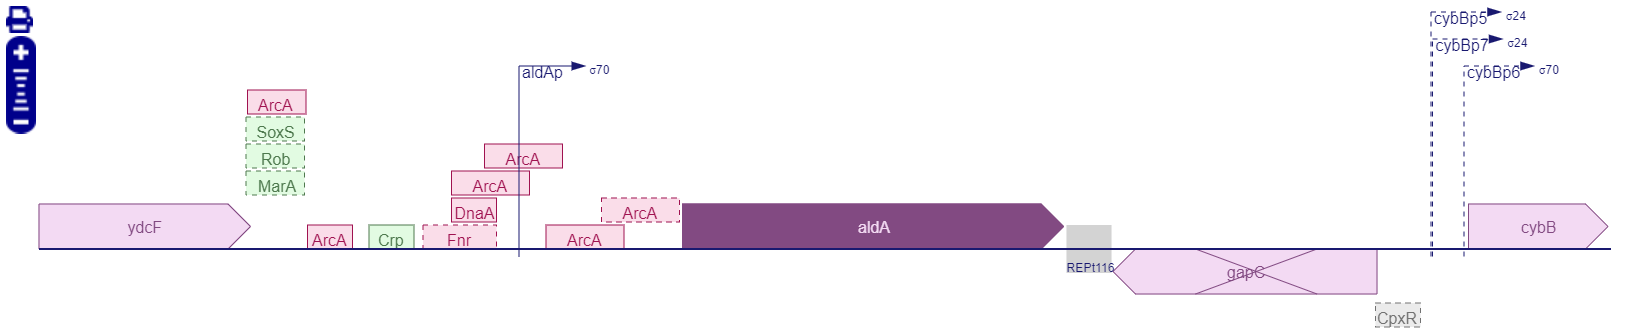

# raiA - Crp-2, CpxR

In [30]:
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'CpxR'
y = ica_data.A.loc[im_cur]
gene_cur = 'b2597' #raiA
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='crxr A',
                             zaxis_title='raiA TPM'))

# Show plot
fig.show()

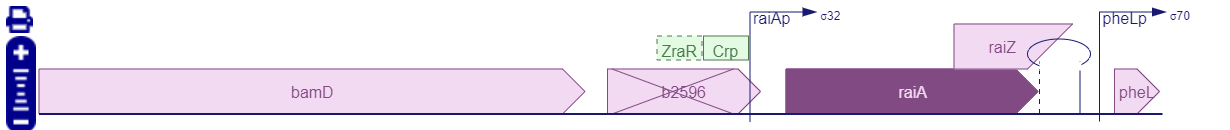

# pck - Crp-2, crp-KO

In [32]:
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'crp-KO'
y = ica_data.A.loc[im_cur]
gene_cur = 'b3403' #pck
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='crp-KO A',
                             zaxis_title='pck TPM'))

# Show plot
fig.show()

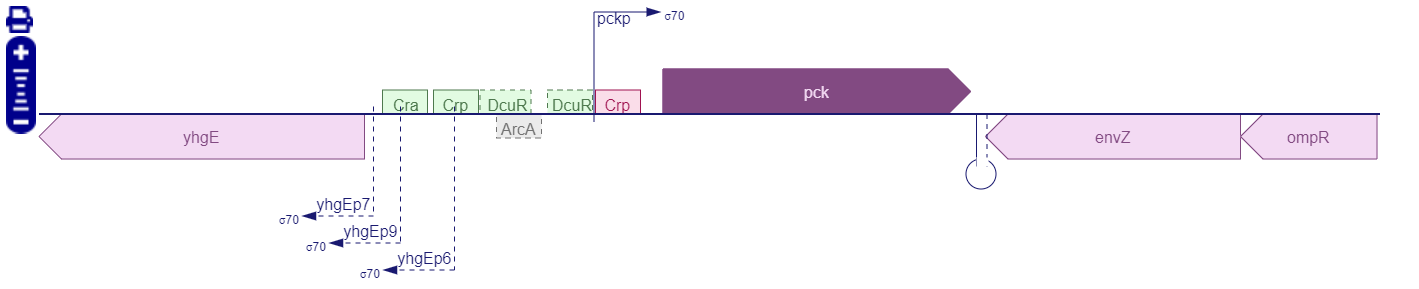

# idnD - Crp-2, GntR/TyrR

In [35]:
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'GntR/TyrR'
y = ica_data.A.loc[im_cur]
gene_cur = 'b4267' #idnD
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='gntr/tyrr A',
                             zaxis_title='idnD TPM'))

# Show plot
fig.show()

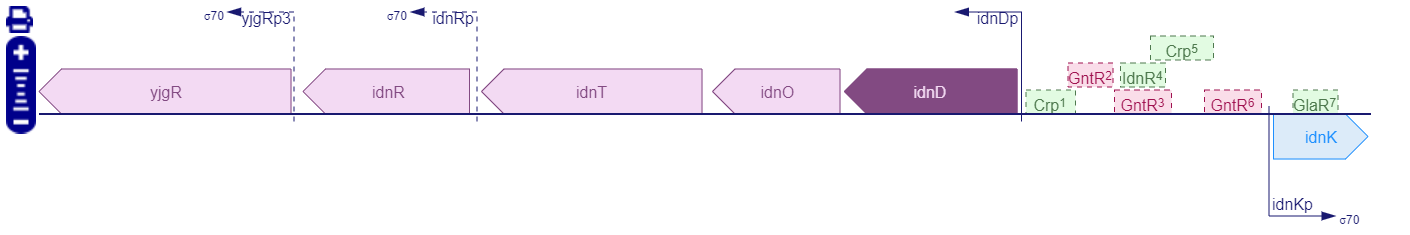

# cdd - Crp-2, YieP

In [36]:
im_cur2 = 'Crp-2'
x = ica_data.A.loc[im_cur2]
im_cur = 'YieP'
y = ica_data.A.loc[im_cur]
gene_cur = 'b2143' #cdd
z = ica_data.X.loc[gene_cur]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# Add axis labels
fig.update_layout(scene=dict(xaxis_title='crp2 A',
                             yaxis_title='yiep A',
                             zaxis_title='cdd TPM'))

# Show plot
fig.show()

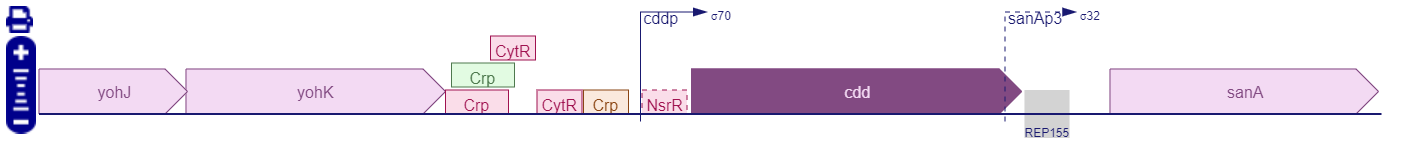